Exploratory Data Analysis

Starting with the most recent year, 2024-25.

Set-up

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns

In [2]:
s24_25 = pd.read_csv("../data/clean_foul_events_2024-25.csv")

Step 1: Understanding the data

In [3]:
print("The shape of the dataset is", s24_25.shape)
print(s24_25.head())

The shape of the dataset is (85379, 8)
   EVENTNUM  EVENTMSGTYPE  PERIOD  PCTIMESTRING HOMEDESCRIPTION  \
0         9             6       1           690             NaN   
1        23             6       1           599             NaN   
2        39             6       1           520          p.foul   
3        65             6       1           428             NaN   
4        73             6       1           387          s.foul   

  VISITORDESCRIPTION  SCOREMARGIN   GAME_ID  
0             p.foul            0  42400405  
1             s.foul           -3  42400405  
2                NaN            1  42400405  
3                NaN            7  42400405  
4                NaN            8  42400405  


In [4]:
print(s24_25.columns)

Index(['EVENTNUM', 'EVENTMSGTYPE', 'PERIOD', 'PCTIMESTRING', 'HOMEDESCRIPTION',
       'VISITORDESCRIPTION', 'SCOREMARGIN', 'GAME_ID'],
      dtype='object')


In [5]:
print(s24_25.dtypes)

EVENTNUM               int64
EVENTMSGTYPE           int64
PERIOD                 int64
PCTIMESTRING           int64
HOMEDESCRIPTION       object
VISITORDESCRIPTION    object
SCOREMARGIN            int64
GAME_ID                int64
dtype: object


In [6]:
print(s24_25.isnull().sum())

EVENTNUM                  0
EVENTMSGTYPE              0
PERIOD                    0
PCTIMESTRING              0
HOMEDESCRIPTION       42948
VISITORDESCRIPTION    42919
SCOREMARGIN               0
GAME_ID                   0
dtype: int64


In [7]:
print("The different fouls logged by the home team in the 2024-24 NBA season are", sorted(s24_25['HOMEDESCRIPTION'].dropna().unique()))
print("The different fouls logged by the away team in the 2024-24 NBA season are", sorted(s24_25['VISITORDESCRIPTION'].dropna().unique()))

The different fouls logged by the home team in the 2024-24 NBA season are ['away.from.play.foul', 'flagrant.foul.type1', 'flagrant.foul.type2', 'foul', 'hanging.tech.foul', 'l.b.foul', 'non-unsportsmanlike tech foul - bench', 'non-unsportsmanlike tech foul - flopping', 'off.foul', 'offensive charge foul', 'p.foul', 'personal take foul', 's.foul', 't.foul', 'too many players tech foul', 'transition take foul']
The different fouls logged by the away team in the 2024-24 NBA season are ['away.from.play.foul', 'flagrant.foul.type1', 'flagrant.foul.type2', 'hanging.tech.foul', 'l.b.foul', 'non-unsportsmanlike tech foul - bench', 'non-unsportsmanlike tech foul - flopping', 'off.foul', 'offensive charge foul', 'p.foul', 'personal take foul', 's.foul', 't.foul', 'too many players tech foul', 'transition take foul']


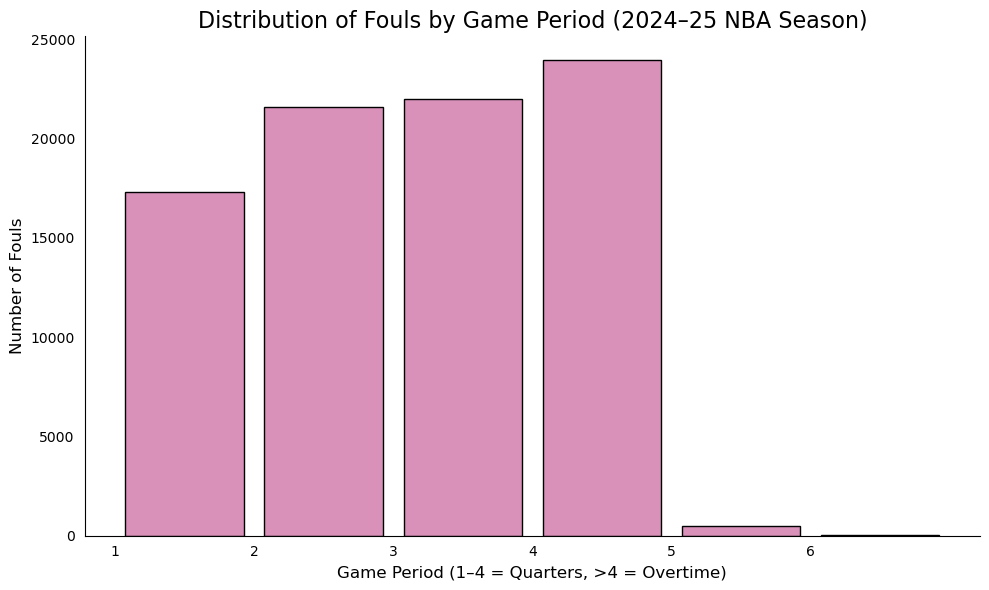

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(
    s24_25["PERIOD"],
    bins=range(1, s24_25["PERIOD"].max() + 2),
    edgecolor='black',
    color="#d991ba",
    rwidth=0.85
)

ax.set_title("Distribution of Fouls by Game Period (2024–25)", fontsize=16)
ax.set_xlabel("Game Period (1–4 = Quarters, >4 = Overtime)", fontsize=12)
ax.set_ylabel("Number of Fouls", fontsize=12)
ax.set_xticks(range(1, s24_25["PERIOD"].max() + 1))
ax.tick_params(axis='both', which='major', labelsize=10)

sns.despine(ax=ax)
ax.tick_params(left=False, bottom=False)

plt.tight_layout()
plt.show()

In [9]:
# fig, ax = plt.subplots(figsize=(10, 6))

# ax.hist(
#     s24_25.dropna(subset=["HOMEDESCRIPTION"])["PERIOD"],
#     bins=range(1, s24_25["PERIOD"].max() + 2),
#     edgecolor='black',
#     color="#8cae68",
#     rwidth=0.85
# )

# ax.set_title("Distribution of Fouls Committed by the Hometeam by Game Period (2024–25 NBA Season)", fontsize=16)
# ax.set_xlabel("Game Period (1–4 = Quarters, >4 = Overtime)", fontsize=12)
# ax.set_ylabel("Number of Fouls", fontsize=12)
# ax.set_xticks(range(1, s24_25["PERIOD"].max() + 1))
# ax.tick_params(axis='both', which='major', labelsize=10)

# sns.despine(ax=ax)
# ax.tick_params(left=False, bottom=False)

# plt.tight_layout()
# plt.show()

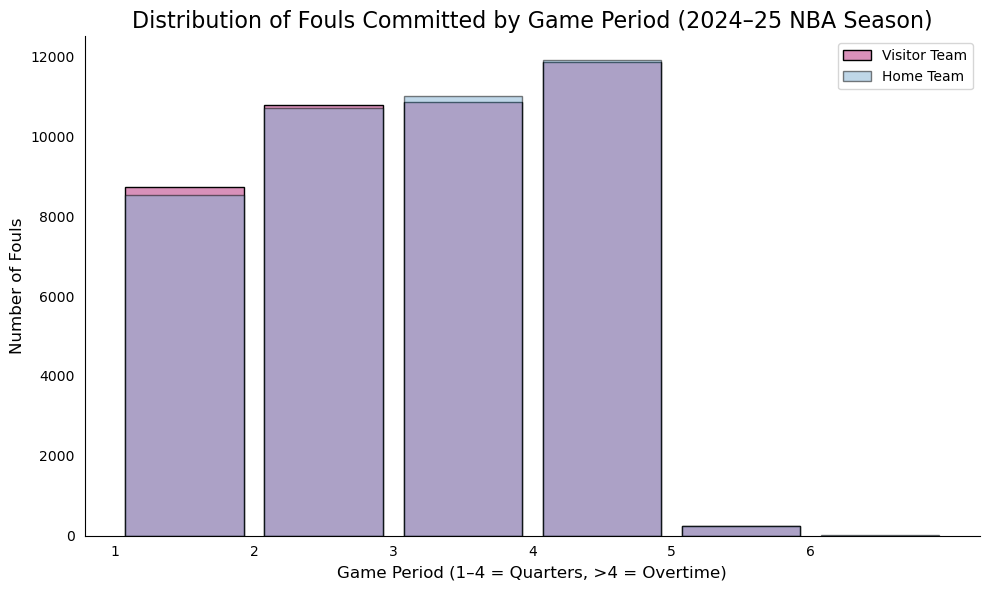

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(
    s24_25.dropna(subset=["VISITORDESCRIPTION"])["PERIOD"],
    bins=range(1, s24_25["PERIOD"].max() + 2),
    edgecolor='black',
    color="#d991ba",
    rwidth=0.85,
    label="Visitor Team"
)

ax.hist(
    s24_25.dropna(subset=["HOMEDESCRIPTION"])["PERIOD"],
    bins=range(1, s24_25["PERIOD"].max() + 2),
    edgecolor='black',
    color="#80b1d3",
    rwidth=0.85,
    alpha = 0.5,
    label="Home Team"
)

ax.set_title("Distribution of Fouls Committed by Game Period (2024–25)", fontsize=16)
ax.set_xlabel("Game Period (1–4 = Quarters, >4 = Overtime)", fontsize=12)
ax.set_ylabel("Number of Fouls", fontsize=12)
ax.set_xticks(range(1, s24_25["PERIOD"].max() + 1))
ax.tick_params(axis='both', which='major', labelsize=10)

sns.despine(ax=ax)
ax.tick_params(left=False, bottom=False)
ax.legend()

plt.tight_layout()
plt.show()

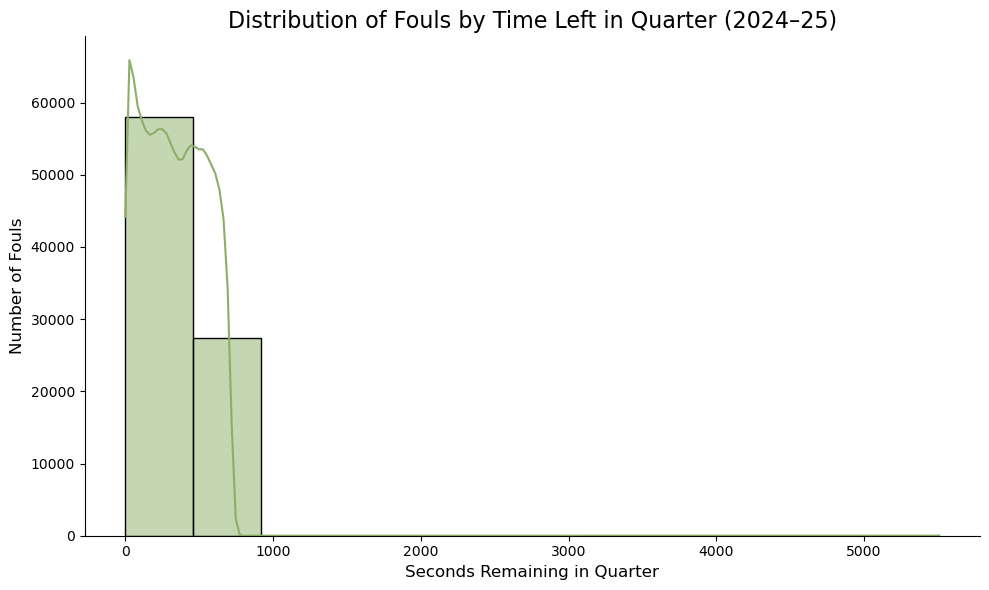

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(s24_25["PCTIMESTRING"], bins=12, kde=True, color="#8cae68", edgecolor='black')

plt.title("Distribution of Fouls by Time Left in Quarter (2024–25)", fontsize=16)
plt.xlabel("Seconds Remaining in Quarter", fontsize=12)
plt.ylabel("Number of Fouls", fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

In [12]:
sorted(s24_25["PCTIMESTRING"].dropna())[-10:]

[720, 720, 720, 720, 720, 720, 720, 720, 5510, 5510]

In [13]:
s24_25 = s24_25[s24_25["PCTIMESTRING"]<=720]
sorted(s24_25["PCTIMESTRING"].dropna())[-10:]

[720, 720, 720, 720, 720, 720, 720, 720, 720, 720]

In [48]:
sorted(s24_25["PCTIMESTRING"].dropna())[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [50]:
print("The maximum score margin in the 2024-25 NBA season is ", s24_25["SCOREMARGIN"].max())
print("The maximum score margin in the 2024-25 NBA season is ", s24_25["SCOREMARGIN"].min())

The maximum score margin in the 2024-25 NBA season is  61
The maximum score margin in the 2024-25 NBA season is  -59


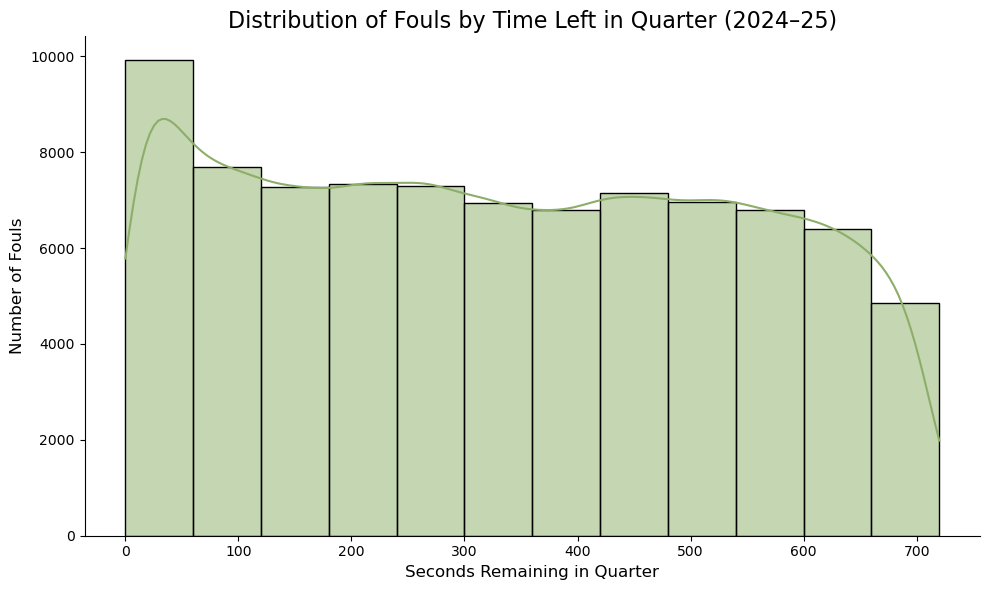

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(s24_25["PCTIMESTRING"], bins=12, kde=True, color="#8cae68", edgecolor='black')

plt.title("Distribution of Fouls by Time Left in Quarter (2024–25)", fontsize=16)
plt.xlabel("Seconds Remaining in Quarter", fontsize=12)
plt.ylabel("Number of Fouls", fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

Note that:

- **NBA time counts down**, so **0 = end of quarter** and **720 = start**.
- So the left bar (700–720) reflects **fewer fouls at the start** of quarters.
- **Rightmost bar (0–60)** reflects **end-of-quarter crunch time**, where fouling (especially intentional) is more frequent.


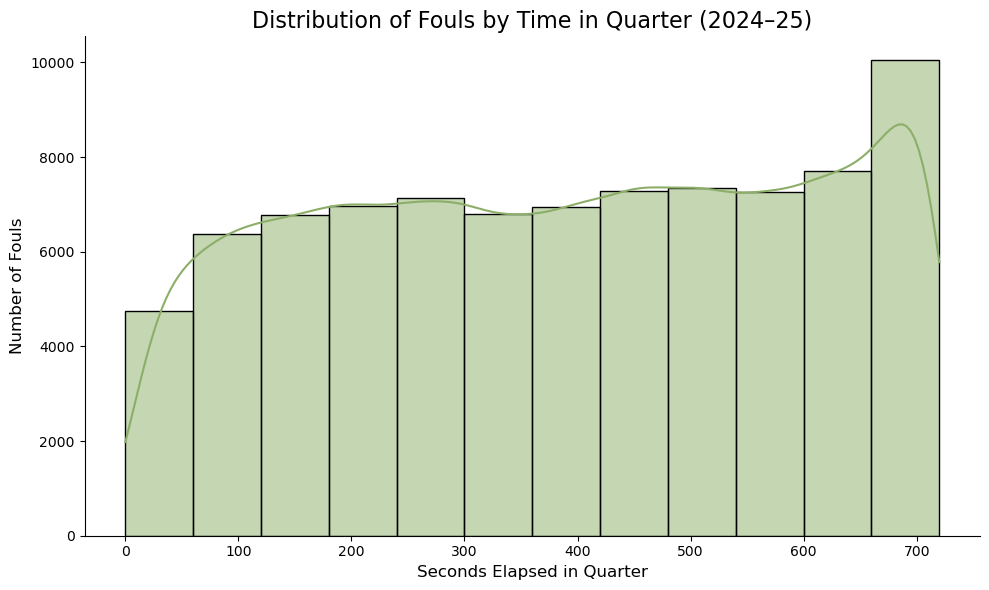

In [15]:
s24_25['SECONDSINQTR'] = 720 - s24_25["PCTIMESTRING"]
plt.figure(figsize=(10, 6))
sns.histplot(s24_25["SECONDSINQTR"], bins=12, kde=True, color="#8cae68", edgecolor='black')

plt.title("Distribution of Fouls by Time in Quarter (2024–25)", fontsize=16)
plt.xlabel("Seconds Elapsed in Quarter", fontsize=12)
plt.ylabel("Number of Fouls", fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

#### Key Observations

#### 1. Foul frequency increases as the quarter progresses
- There's a clear **upward trend** in fouls.
- This suggests **players foul more as the quarter progresses**, likely due to:
  - **Tighter defense**
  - **Frustration fouls**
  - **Bonus situations**
  - **Intentional fouling strategies**

#### 2. Sharp spike in the final minute
- The last bin has the **highest number of fouls**.
- This is classic **“crunch time” fouling**: teams intentionally foul to stop the clock, force the fouled player to shoot free throws, and potentially gain possession of the ball.

#### 3. Relatively steady foul rate mid-quarter
- From minutes 2–10, the foul rate stays fairly **consistent**.
- Suggests a stable pace of play without major disruption or strategic shifts.

### Implications / Insights
- Coaches and analysts might:
  - Emphasise **discipline early in quarters** to avoid bonus penalties late.
  - Design **clock-aware defensive plays** for the final minute.

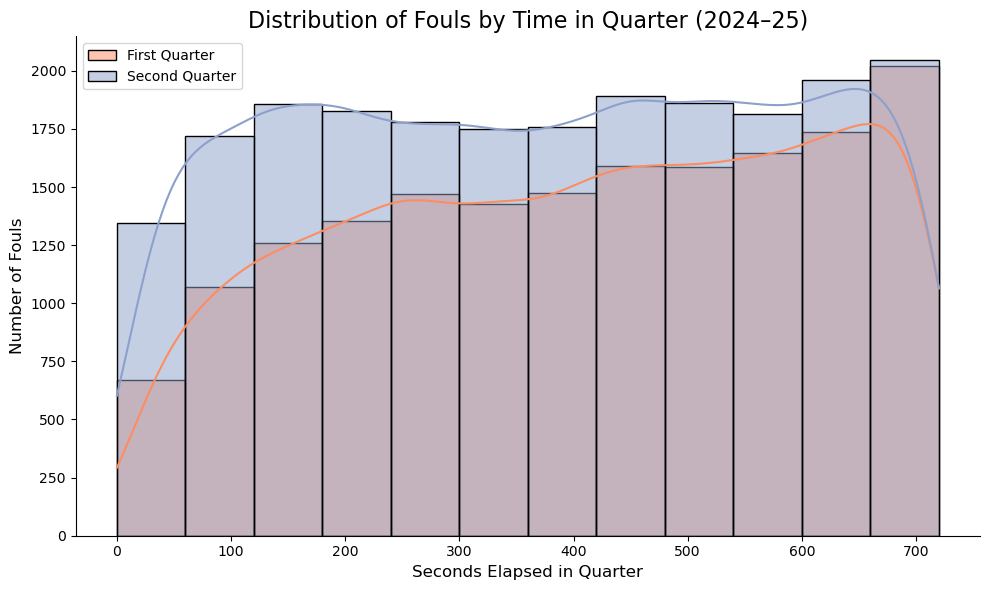

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(s24_25[s24_25["PERIOD"]== 1]["SECONDSINQTR"], bins=12, kde=True, color="#fc8d62", edgecolor='black', label='First Quarter')
sns.histplot(s24_25[s24_25["PERIOD"]== 2]["SECONDSINQTR"], bins=12, kde=True, color="#8da0cb", edgecolor='black', label='Second Quarter')


plt.title("Distribution of Fouls by Time in Quarter (2024–25)", fontsize=16)
plt.xlabel("Seconds Elapsed in Quarter", fontsize=12)
plt.ylabel("Number of Fouls", fontsize=12)
sns.despine()
plt.legend()
plt.tight_layout()
plt.show()

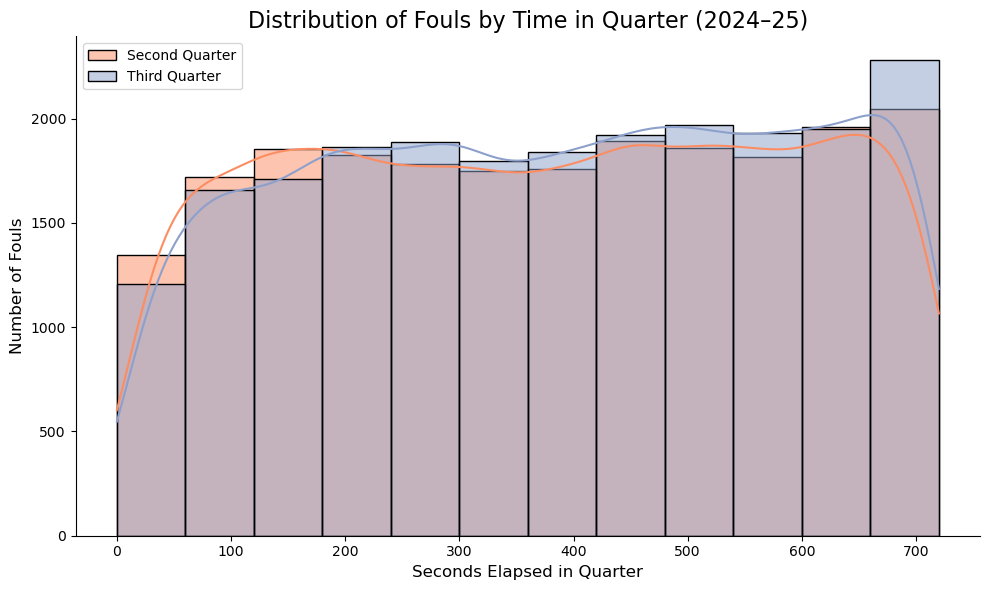

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(s24_25[s24_25["PERIOD"]== 2]["SECONDSINQTR"], bins=12, kde=True, color="#fc8d62", edgecolor='black', label='Second Quarter')
sns.histplot(s24_25[s24_25["PERIOD"]== 3]["SECONDSINQTR"], bins=12, kde=True, color="#8da0cb", edgecolor='black', label='Third Quarter')


plt.title("Distribution of Fouls by Time in Quarter (2024–25)", fontsize=16)
plt.xlabel("Seconds Elapsed in Quarter", fontsize=12)
plt.ylabel("Number of Fouls", fontsize=12)
sns.despine()
plt.legend()
plt.tight_layout()
plt.show()

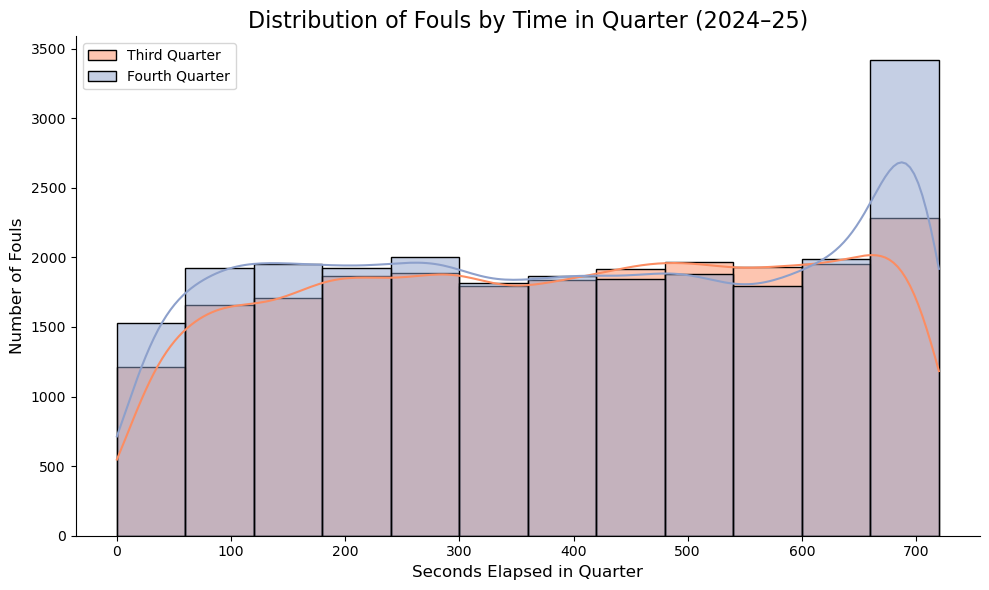

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(s24_25[s24_25["PERIOD"]== 3]["SECONDSINQTR"], bins=12, kde=True, color="#fc8d62", edgecolor='black', label='Third Quarter')
sns.histplot(s24_25[s24_25["PERIOD"]== 4]["SECONDSINQTR"], bins=12, kde=True, color="#8da0cb", edgecolor='black', label='Fourth Quarter')


plt.title("Distribution of Fouls by Time in Quarter (2024–25)", fontsize=16)
plt.xlabel("Seconds Elapsed in Quarter", fontsize=12)
plt.ylabel("Number of Fouls", fontsize=12)
sns.despine()
plt.legend()
plt.tight_layout()
plt.show()

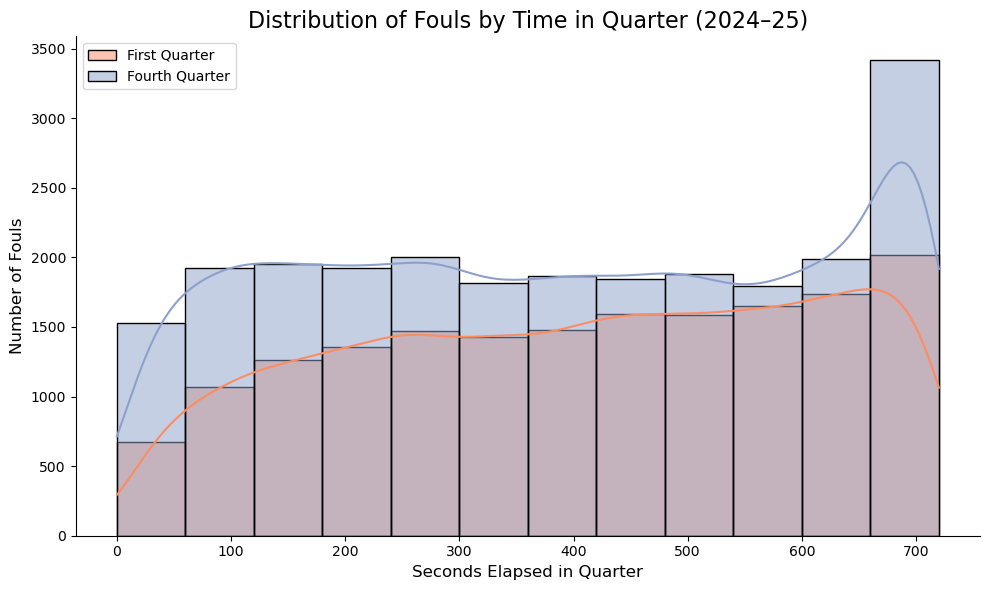

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(s24_25[s24_25["PERIOD"]== 1]["SECONDSINQTR"], bins=12, kde=True, color="#fc8d62", edgecolor='black', label='First Quarter')
sns.histplot(s24_25[s24_25["PERIOD"]== 4]["SECONDSINQTR"], bins=12, kde=True, color="#8da0cb", edgecolor='black', label='Fourth Quarter')


plt.title("Distribution of Fouls by Time in Quarter (2024–25)", fontsize=16)
plt.xlabel("Seconds Elapsed in Quarter", fontsize=12)
plt.ylabel("Number of Fouls", fontsize=12)
sns.despine()
plt.legend()
plt.tight_layout()
plt.show()

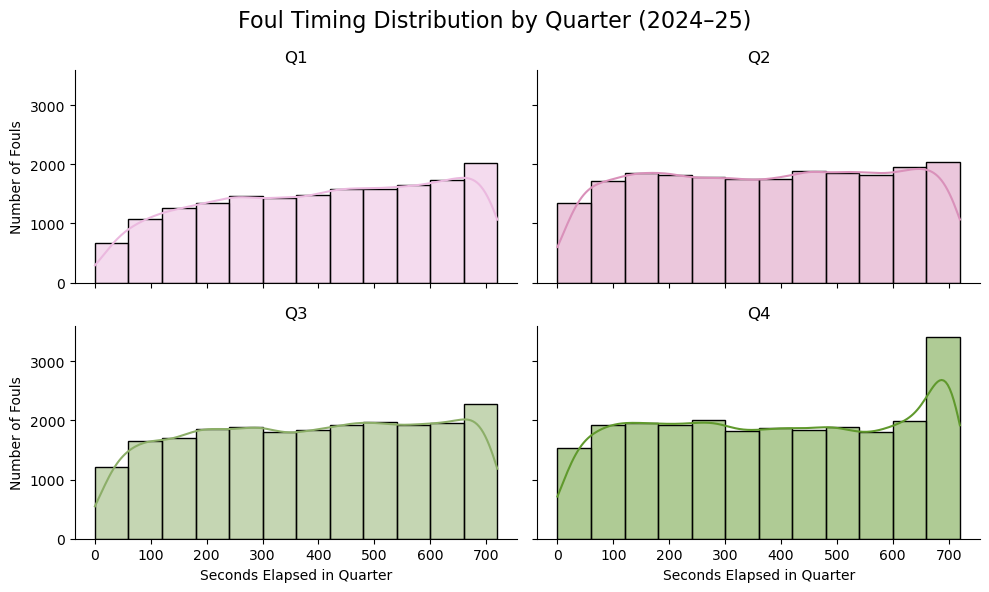

In [44]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharex=True, sharey=True)
quarters = [1, 2, 3, 4]
colors = ["#ebb9df", "#d991ba", "#8cae68", "#60992d"]

for i, period in enumerate(quarters):
    ax = axes[i // 2, i % 2]
    sns.histplot(
        s24_25[s24_25["PERIOD"] == period]["SECONDSINQTR"],
        bins=12, kde=True, color=colors[i], edgecolor="black", ax=ax
    )
    ax.set_title(f"Q{period}")
    ax.set_xlabel("Seconds Elapsed in Quarter")
    ax.set_ylabel("Number of Fouls")
    sns.despine(ax=ax)

plt.suptitle("Foul Timing Distribution by Quarter (2024–25)", fontsize=16)
plt.tight_layout()
plt.show()

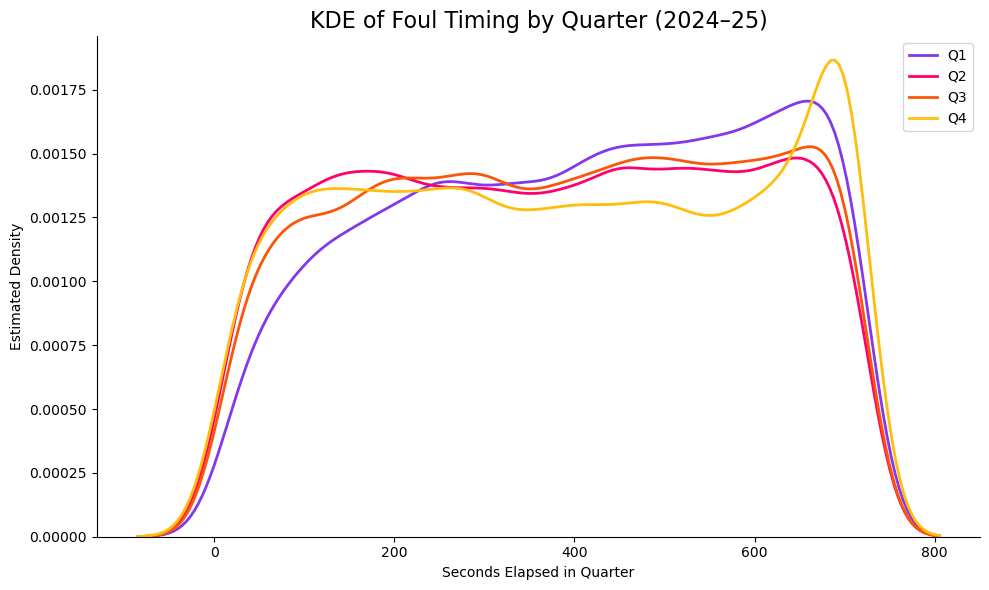

In [47]:
plt.figure(figsize=(10, 6))
colors = ["#8338ec", "#ff006e", "#fb5607", "#ffbe0b"]

for i, period in enumerate(quarters):
    sns.kdeplot(
        data=s24_25[s24_25["PERIOD"] == period],
        x="SECONDSINQTR",
        label=f"Q{period}",
        bw_adjust=1,
        fill=False,
        color=colors[i],
        linewidth=2
    )

plt.title("KDE of Foul Timing by Quarter (2024–25)", fontsize=16)
plt.xlabel("Seconds Elapsed in Quarter")
plt.ylabel("Estimated Density")
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()
